In [1]:
import glob
import json

In [107]:
def field_value(f, fn):
    if fn not in f:
        return '-'
    if f[fn] == '':
        return '?'
    return f[fn]

with open('openfda.csv', 'wt') as f2:
    print('medicinalproduct,drugadministrationroute,reactionmeddrapt,safetyreportid,drugs,reactions', file=f2)
    for fn in glob.glob('drug-event*.json'):
        with open(fn, 'rt') as f:
            x = json.load(f)
            for i in range(len(x['results'])):
                #print(x['results'][i]['primarysource'])
                y = x['results'][i]['patient']
                print(field_value(y['drug'][0], 'medicinalproduct') + ',' + field_value(y['drug'][0], 'drugadministrationroute') + ',' + y['reaction'][0]['reactionmeddrapt']+','+x['results'][i]['safetyreportid']+','+str(len(y['drug']))+','+str(len(y['reaction'])), file=f2)

In [43]:
with open('openfda2.csv', 'wt') as f2:
    print('medicinalproduct1,medicinalproduct2,reactionmeddrapt,safetyreportid', file=f2)
    for fn in glob.glob('drug-event*.json'):
        with open(fn, 'rt') as f:
            x = json.load(f)
            for i in range(len(x['results'])):
                y = x['results'][i]['patient']
                for j in range(len(y['drug'])):
                    for k in range(i+1, len(y['drug'])):
                        print(y['drug'][j]['medicinalproduct'] + ',' + y['drug'][k]['medicinalproduct'] + ',' + y['reaction'][0]['reactionmeddrapt']+','+x['results'][i]['safetyreportid'], file=f2)

In [93]:
def sentences():
    for fn in glob.glob('drug-event*.json'):
        with open(fn, 'rt') as f:
            x = json.load(f)
            for i in range(len(x['results'])):
                y = x['results'][i]['patient']
                yield [z['reactionmeddrapt'] for z in y['reaction']]

def sentences2():
    for fn in glob.glob('drug-event*.json'):
        with open(fn, 'rt') as f:
            x = json.load(f)
            for i in range(len(x['results'])):
                y = x['results'][i]['patient']
                yield [z['medicinalproduct'] for z in y['drug']]

In [94]:
from gensim.test.utils import common_texts
from gensim.sklearn_api import W2VTransformer

In [95]:
model = W2VTransformer(size=10, min_count=1, seed=1)

In [96]:
wordvecs = model.fit(list(sentences2()))

In [97]:
words = set()
words_c = {}
for s in sentences2():
    for w in s:
        words.add(w)
        if w not in words_c:
            words_c[w] = 0
        words_c[w] += 1

In [98]:
t = wordvecs.transform(words)

In [99]:
t.shape

(13753, 10)

In [100]:
import math
from sklearn.manifold import TSNE
import seaborn as sns

In [101]:
tsne = TSNE(n_iter=3000, init='pca', learning_rate='auto', n_jobs=-1)
xy = tsne.fit_transform(t)
xy.shape

/Users/dirk/miniforge3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


(13753, 2)

/Users/dirk/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

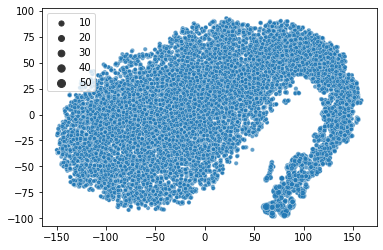

In [102]:
sns.scatterplot(xy[:, 0], xy[:, 1], size=[math.sqrt(words_c[w]) for w in words], alpha=0.7)

In [72]:
xy.shape

(6324, 2)